In [111]:
# source / good links for all this
# https://datascienceplus.com/anomaly-detection-in-r-the-tidy-way/

# Anomaly Detection with 'Anomalize' R Package

> *This package is **similar** to Twitter's AnomalyDetection package, but `anomalize` does something specific which no other Anomaly Detection package was doing:  TIDY Anomaly Detection (think R tidyverse)*

>  *Open-sourced by `Business Science` does Time Series Anomaly Detection that goes inline with other Tidyverse packages (or packages supporting tidy data) – with one of the most used tidyverse functionality – compatibility with the pipe %>% operator to write readable and reproducible data pipeline. Don't want to lose your python knowledge ?  Use pipes (just my opinion)...*

```  

Details:  

The 'anomalize' package enables a "tidy" workflow for detecting 
anomalies in data.   

The main functions are time_decompose(), anomalize(), and 
time_recompose().   

When combined, it's quite simple to decompose time series, detect anomalies, and create bands separating the "normal" data from the anomalous 
data at scale (i.e. for multiple time series).   

Time series decomposition is used to remove trend and seasonal components via the time_decompose() function and methods include seasonal 
decomposition of time series by Loess ("stl") and seasonal
decomposition by piecewise medians ("twitter").   

The anomalize() function implements two methods for anomaly detection of residuals including using an inner quartile range ("iqr") and 
generalized extreme studentized deviation ("gesd").   

These methods are based on those used in the 'forecast' package and the 
Twitter 'AnomalyDetection' package.  

This just wraps everything up, same methods, diff approach and graphing
output...
```

In [112]:
# dependencies it turns out will include: padr, Quandl, timetk, sweep, anomalize

In [113]:

library(tidyverse)
library(devtools)
# installing github version, not from CRAN
# devtools::install_github("business-science/anomalize")  <use this

# ref:  CRAN version
# install.packages('anomalize', dependencies = T) < older slightly

library(grid)
library(gridExtra)


In [126]:
options(repr.plot.width = 5.5, repr.plot.height = 8)

In [114]:

# install.packages("coindeskr", dependencies = T) <use


## Case:  Bitcoin Price Anomaly Detection

In [115]:

# detect anomalies in bitcoin price since 2017

library(anomalize) #tidy anomaly detectiom

library(tidyverse) #tidyverse packages like dplyr, ggplot, tidyr

library(coindeskr) #bitcoin price extraction from coindesk


In [116]:

# Data Extraction
# We use get_historic_price() function from coindeskr to extract 
# historic bitcoin price from Coindesk. The resulting dataframe is 
# stored in the object btc

btc <- get_historic_price(start = "2017-01-01")

head(btc)

tail(btc)


,Price
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
2017-01-06,895.6700


,Price
2018-12-27,3632.680
2018-12-28,3937.050
2018-12-29,3779.713
2018-12-30,3880.907
2018-12-31,3740.500
2019-01-01,3869.470


In [117]:

# data preprocessing: 
# make it into a tibble table so to speak 

btc_ts <- btc %>% rownames_to_column() %>% as.tibble() %>% 
  mutate(date = as.Date(rowname)) %>% select(-one_of('rowname'))

head(btc_ts)

#  is.tibble(btc_ts) outputs 'TRUE', get it ? 


Price,date
997.6888,2017-01-01
1018.0500,2017-01-02
1030.8175,2017-01-03
1129.8700,2017-01-04
1005.8150,2017-01-05
895.6700,2017-01-06


Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 7 days
trend = 91 days


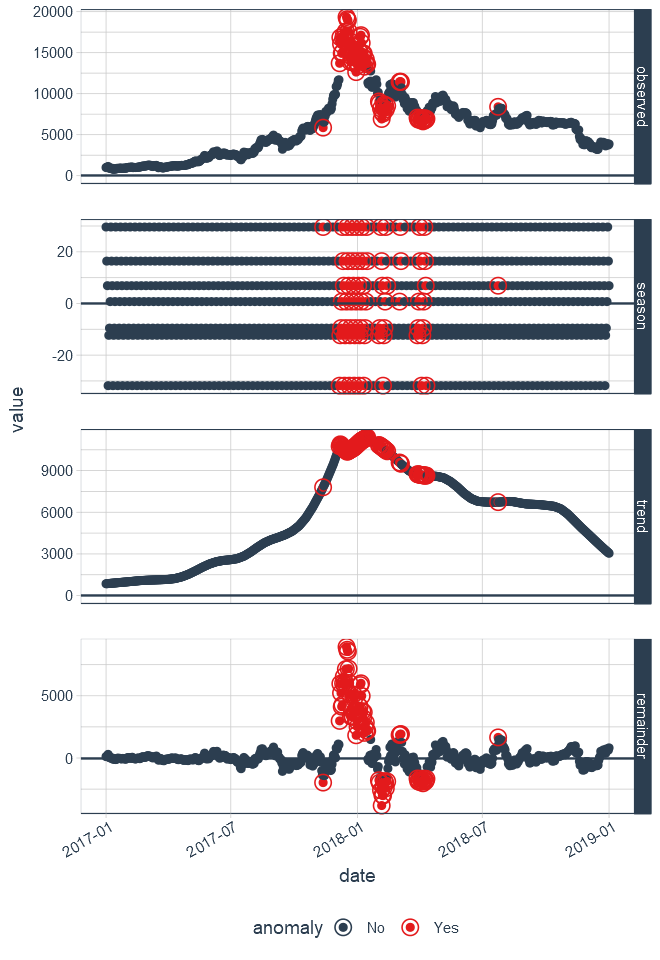

In [127]:

# > Time Series Decomposition with Anomalies < 

# One of the important things to do with Time Series data before 
# starting with Time Series forecasting or Modelling is Time Series
# Decomposition where the Time series data is decomposed into Seasonal, 
# Trend and remainder components. anomalize has got a function time_decompose() to perform the same. Once the components are decomposed, anomalize can detect and flag anomalies in the decomposed data of the reminder component which then could be visualized with plot_anomaly_decomposition() .

btc_ts %>% 
  time_decompose(Price, method = "stl", frequency = "auto", trend = "auto") %>%
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
  plot_anomaly_decomposition() 


*Decomposition happens based on ‘stl’ method which is the common method of time series decomposition but if you have been using Twitter’s AnomalyDetection, then the same can be implemented in anomalize by combining time_decompose(method = “twitter”) with anomalize(method = "gesd"). Also the ‘stl’ method of decomposition can also be combined with anomalize(method = "iqr") for a different IQR based anomaly detection.*

<br>
<hr>
<br>

## Anomaly Detection


*Anomaly Detection and Plotting the detected anomalies are almost similar to what we saw above with Time Series Decomposition. It’s just that decomposed components after anomaly detection are recomposed back with time_recompose() and plotted with plot_anomalies(). The package itself automatically takes care of a lot of parameter setting like index, frequency and trend, making it easier to run anomaly detection out of the box with less prior expertise in the same domain.*


Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 7 days
trend = 91 days


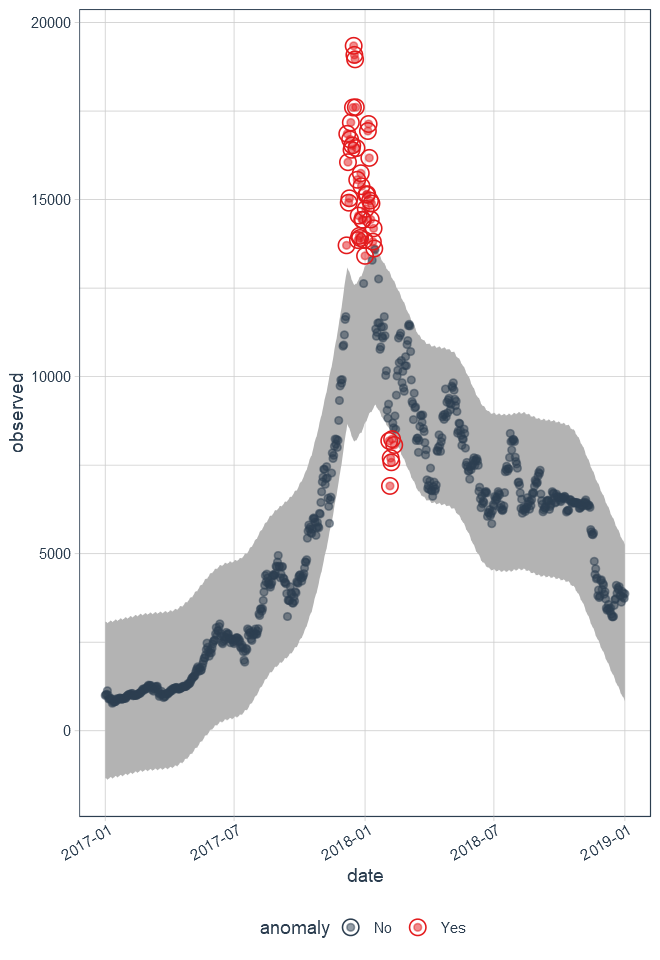

In [128]:

btc_ts %>% 
  time_decompose(Price) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

# could pipe this more into ggplot2 to make it beautiful



*It could be very well inferred from the given plot how accurate the anomaly detection is finding out the Bitcoin Price madness that happened during the early 2018.*


In [100]:
# Helpful Starter Guide:
# https://cran.r-project.org/web/packages/anomalize/vignettes/anomalize_quick_start_guide.html

<br>
<hr>
<br>

## Hard Core Details

In [101]:

# time series examples, hmmmm, maybe the time series of the number of packages 
# downloaed (daily) for a period of time ? 

# daily details of downloads (daily) for 15 core tidyverse packages
head(tidyverse_cran_downloads)


date,count,package
2017-01-01,873,tidyr
2017-01-02,1840,tidyr
2017-01-03,2495,tidyr
2017-01-04,2906,tidyr
2017-01-05,2847,tidyr
2017-01-06,2756,tidyr


In [102]:

# devtools::install_github("metacran/cranlogs")
library(cranlogs)

# use it to query the CRAN logs server, and the results are returned in a df
# example: cran_downloads(when = "last-week", packages = c("ggplot2", "httr"))

cran_downloads(when = "last-week")


date,count
2018-12-25,1001042
2018-12-26,1366816
2018-12-27,1509497
2018-12-28,1437090
2018-12-29,952720
2018-12-30,899605
2018-12-31,1178071


In [103]:

cran_top_downloads()


No encoding supplied: defaulting to UTF-8.


rank,package,count,from,to
1,WGCNA,17071,2018-12-31,2018-12-31
2,Rcpp,12053,2018-12-31,2018-12-31
3,rlang,10514,2018-12-31,2018-12-31
4,dplyr,9687,2018-12-31,2018-12-31
5,ggplot2,9523,2018-12-31,2018-12-31
6,yaml,8706,2018-12-31,2018-12-31
7,pillar,8005,2018-12-31,2018-12-31
8,glue,7815,2018-12-31,2018-12-31
9,knitr,7602,2018-12-31,2018-12-31
10,stringr,7576,2018-12-31,2018-12-31


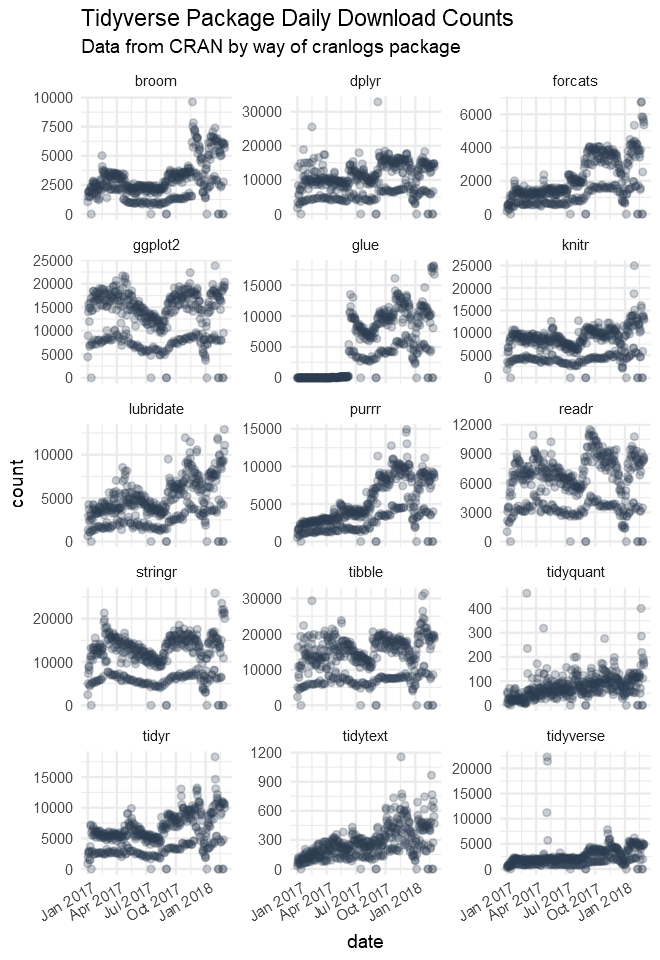

In [129]:

tidyverse_cran_downloads %>% 
    ggplot(aes(date,count)) +
    geom_point(color="#2c3e50", alpha=0.25) +
    facet_wrap(~ package, scale = "free_y", ncol=3) + 
    theme_minimal() + 
    theme(axis.text.x = element_text(angle=30,hjust=1)) +
    labs(title="Tidyverse Package Daily Download Counts",
         subtitle="Data from CRAN by way of cranlogs package")


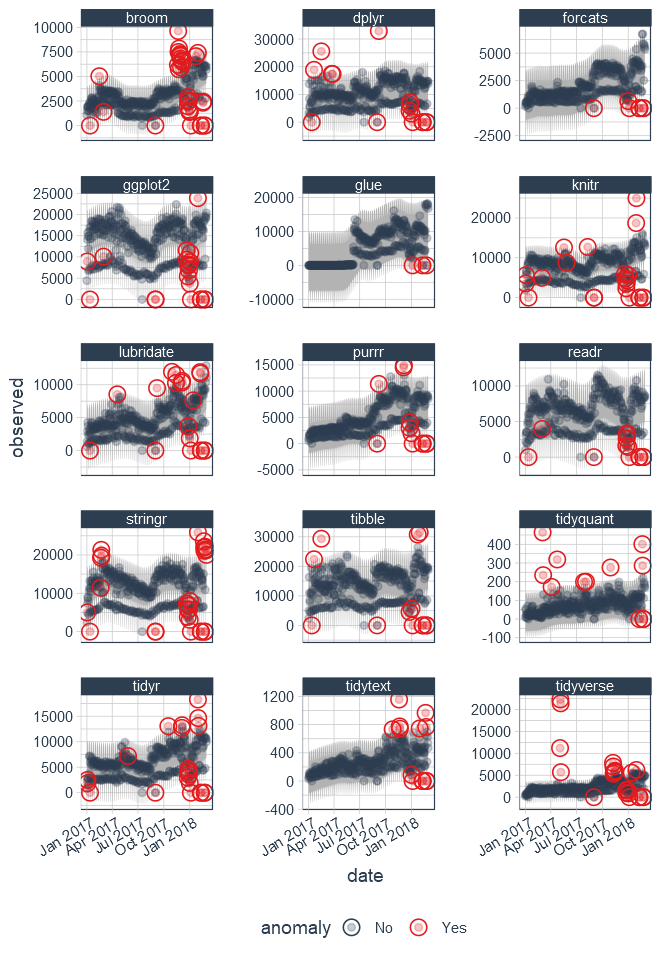

In [130]:

tidyverse_cran_downloads   %>% 
    time_decompose(count)  %>% 
    anomalize(remainder)   %>%
    time_recompose()       %>% 
    plot_anomalies(time_recomposed = T, ncol=3,alpha_dots = 0.25)


In [106]:

# If you are interested in extracting the actual datapoints which are anomalies,
# the following code could be used:

tidyverse_cran_downloads   %>% 
    time_decompose(count)  %>% 
    anomalize(remainder)   %>%
    time_recompose()       %>% 
    filter(anomaly == "Yes") 


package,date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
tidyr,2017-01-02,1.840000e+03,901.0113,5046.782,-4107.794,-3747.904,3707.661,Yes,2199.8897,9655.454
tidyr,2017-01-03,2.495000e+03,1459.7147,5040.983,-4005.697,-3747.904,3707.661,Yes,2752.7933,10208.358
tidyr,2017-01-12,2.273737e-13,1238.7991,4988.629,-6227.428,-3747.904,3707.661,Yes,2479.5237,9935.088
tidyr,2017-05-27,7.190000e+03,-2635.0098,5178.248,4646.761,-3747.904,3707.661,Yes,-1204.6654,6250.899
tidyr,2017-09-01,0.000000e+00,367.1952,5832.336,-6199.531,-3747.904,3707.661,Yes,2451.6271,9907.192
tidyr,2017-10-17,1.306300e+04,1459.7147,7074.273,4529.013,-3747.904,3707.661,Yes,4786.0835,12241.648
tidyr,2017-12-04,1.272000e+04,901.0113,7900.042,3918.947,-3747.904,3707.661,Yes,5053.1492,12508.714
tidyr,2017-12-05,1.323800e+04,1459.7147,7889.607,3888.678,-3747.904,3707.661,Yes,5601.4177,13056.982
tidyr,2017-12-25,2.959000e+03,901.0113,7618.237,-5560.248,-3747.904,3707.661,Yes,4771.3444,12226.909
tidyr,2017-12-26,4.107000e+03,1459.7147,7610.137,-4962.851,-3747.904,3707.661,Yes,5321.9473,12777.512


In [108]:

# anything else ? 

#  https://www.youtube.com/watch?v=Gk_HwjhlQJs


<br>
<hr>
<br>

## Or going back to the basics

In [131]:

ToothGrowth$dose <- as.factor(ToothGrowth$dose)
head(ToothGrowth)


len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


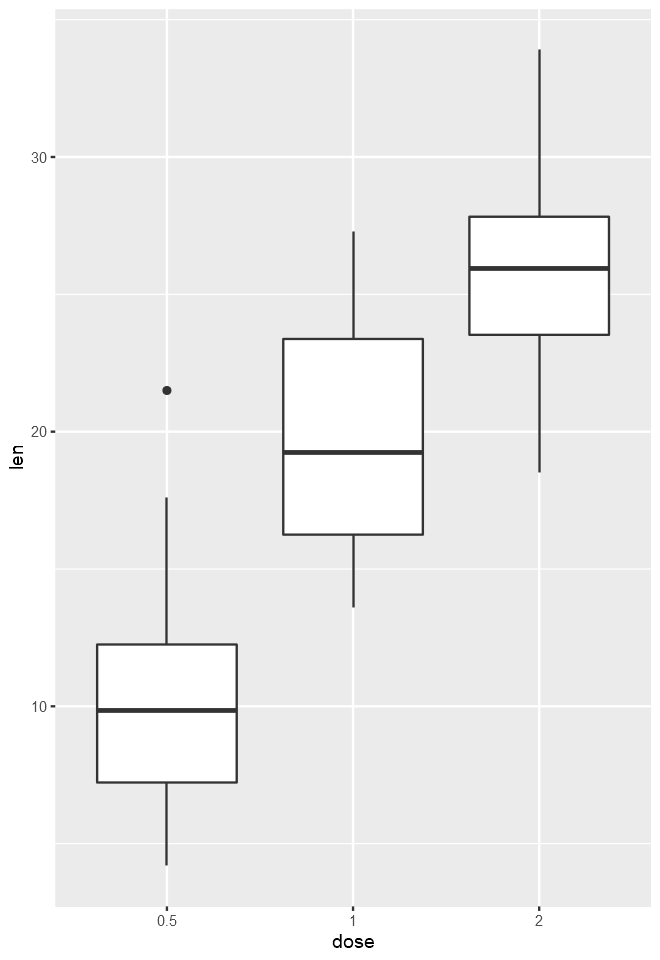

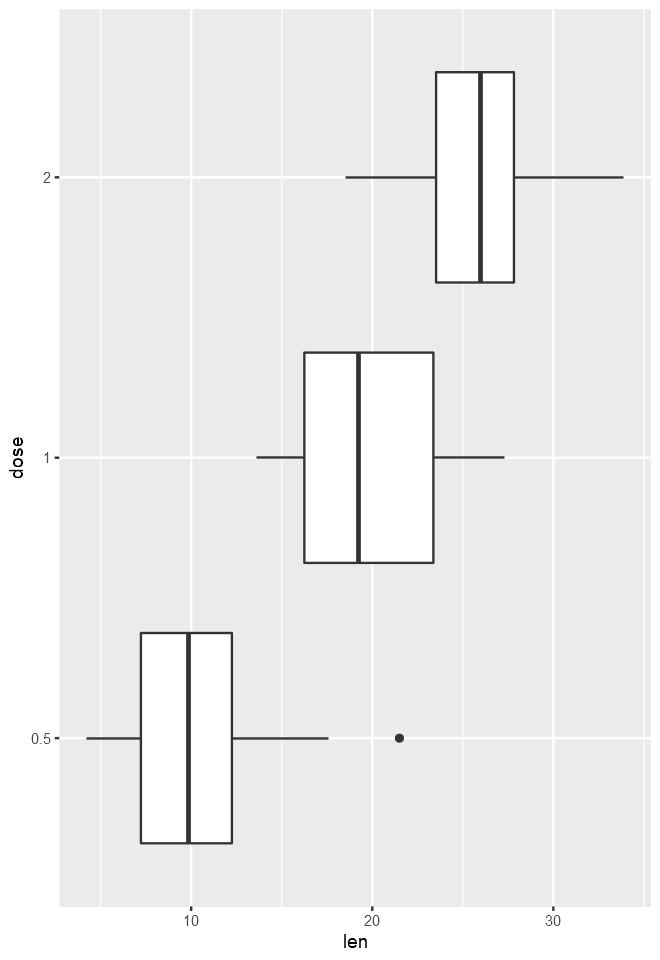

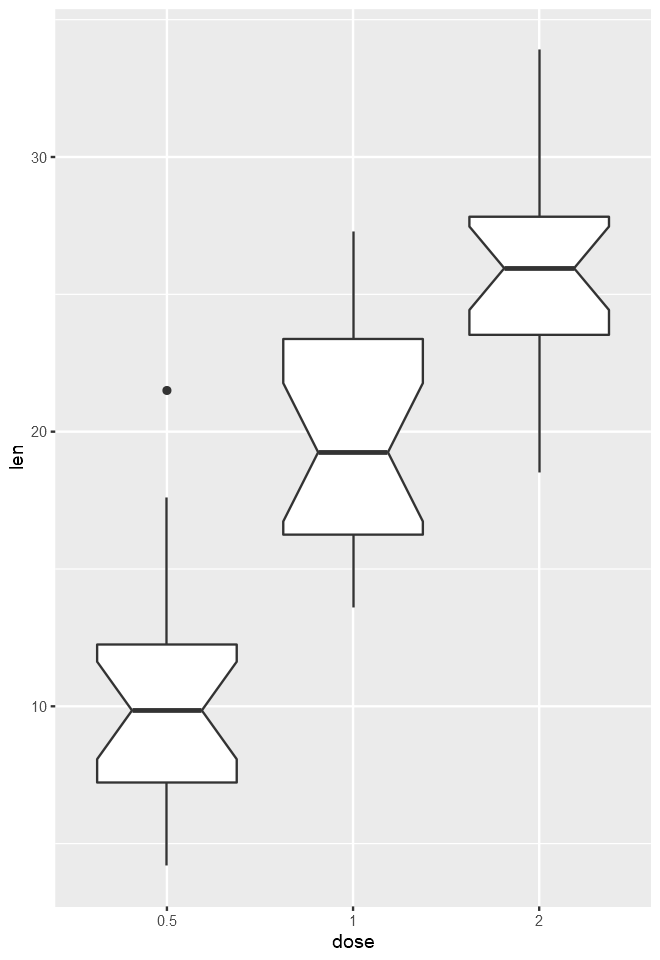

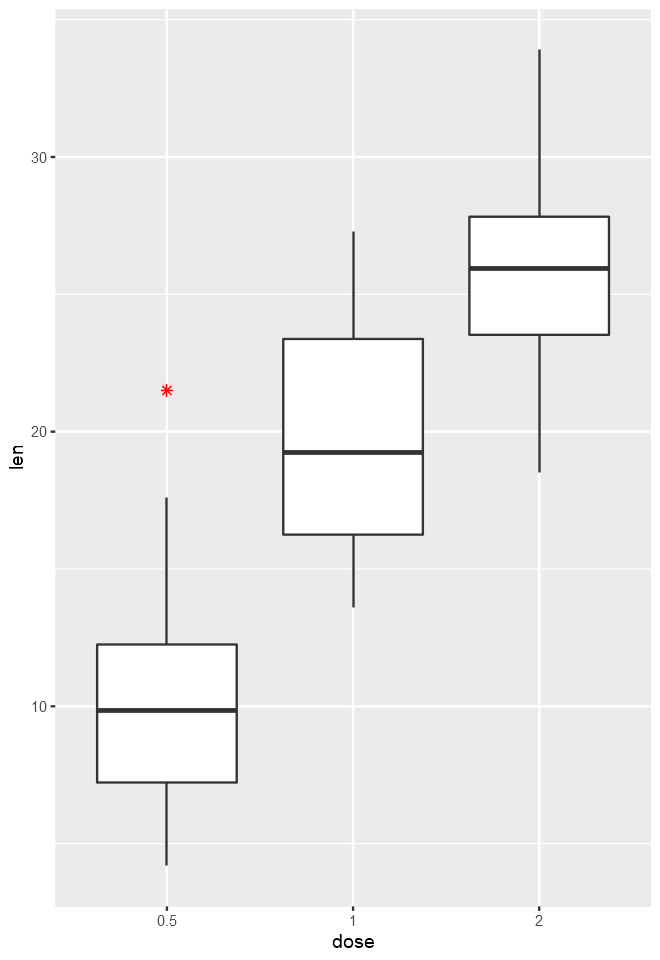

In [132]:

# Basic box plot
p <- ggplot(ToothGrowth, aes(x=dose, y=len)) + 
  geom_boxplot()
p

# Rotate the box plot
p + coord_flip()

# Notched box plot
ggplot(ToothGrowth, aes(x=dose, y=len)) + 
  geom_boxplot(notch=TRUE)

# Change outlier, color, shape and size
ggplot(ToothGrowth, aes(x=dose, y=len)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=2)


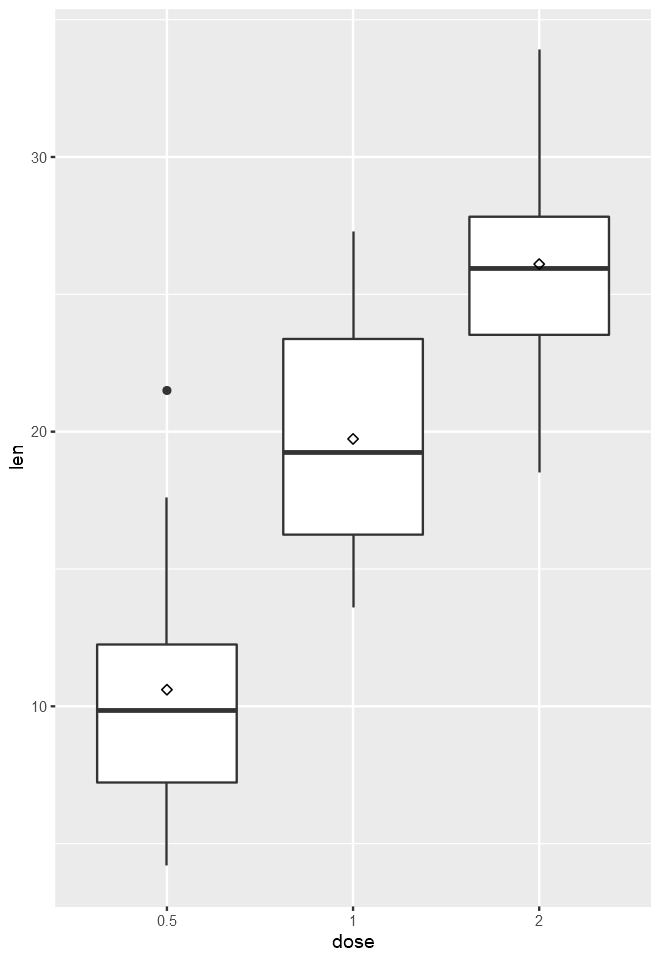

In [133]:

p + stat_summary(fun.y=mean, geom="point", shape=23, size=2)


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


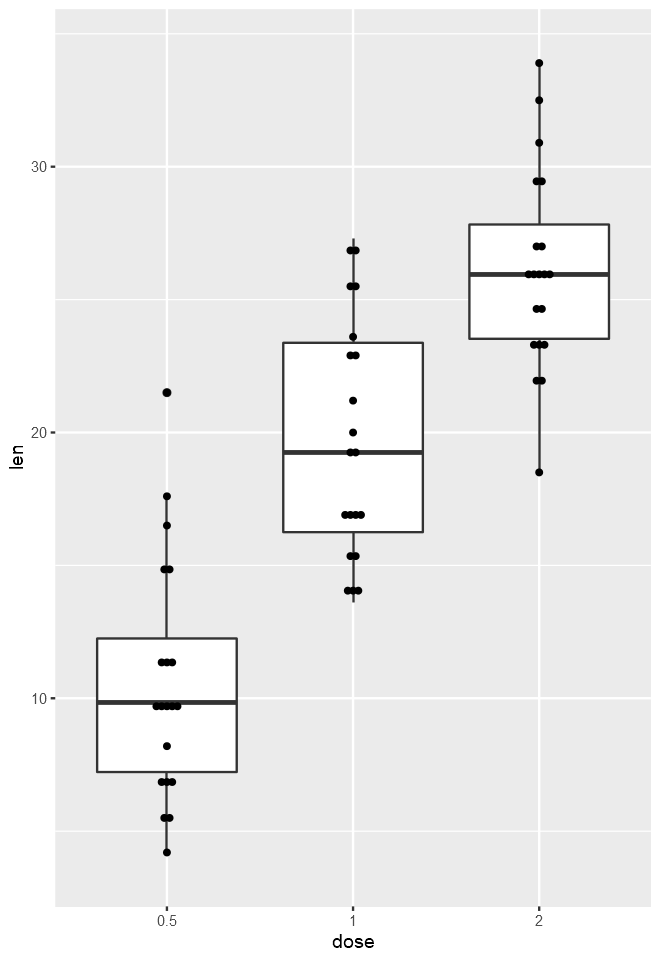

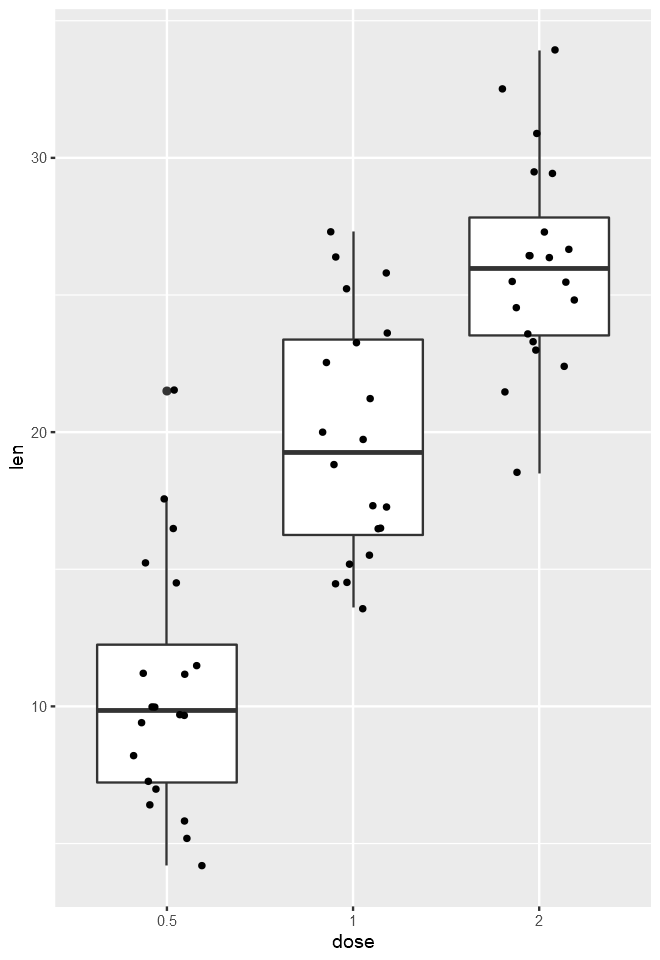

In [136]:

# Box plot with dot plot
p + geom_dotplot(binaxis='y', stackdir='center', dotsize=.2)

# Box plot with jittered points
# 0.2 : degree of jitter in x direction
p + geom_jitter(shape=16, position=position_jitter(0.2))




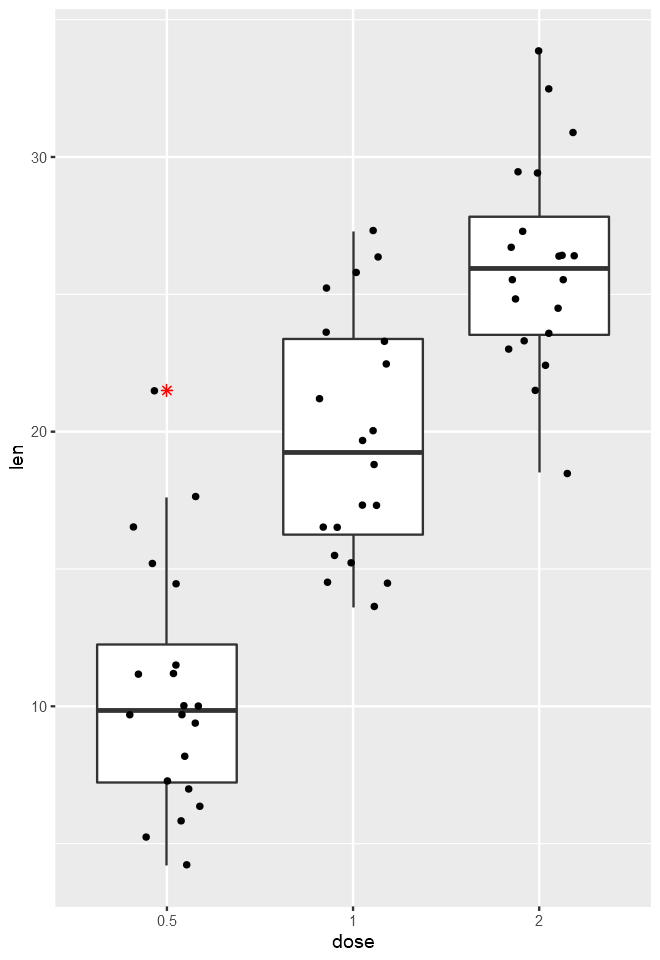

In [135]:

q <- ggplot(ToothGrowth, aes(x=dose, y=len)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=2) 

q + geom_jitter(shape=16, position=position_jitter(0.2))
